# Numpy Intro

### Load basic libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
result = None

### Numpy basic operations

What provides Numpy:

- ndarray --> fast and space-efficient multidimensional array with vectorized arithmetic operations and sophisticated broadcasting capabilities

- Standard mathematical functions for fast operations on entire arrays of data without using loops

- Read/Write tools for transfering data to disk or working with memory-mapped files

- Linear algebra, random number generation and Fourier transform capabilities

- Tools for integrating code written in C, C++, and Fortran

While NumPy by itself does not provide very much high-level data analytical functionality, having an understanding of NumPy arrays and array-oriented computing will help you use tools like pandas much more effectively.

In [2]:
# Create a rank 1 array

# Print its type and shape

# Update an element within the array

# Create a rank 2 array


In [3]:
np.zeros?

In [4]:
# Create an array of zeros

# Create an array of ones

# Create a constant array

# Create an identity matrix

# Create a matrix filled with random values

# Allocate matrix without initializing values


<font color=red>NOTE: It’s not safe to assume that np.empty will return an array of all zeros. In many cases, as previously shown, it will return uninitialized garbage values.</font>

### Array Indexing and Slicing

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array.

Note that np.array tries to infer a good data type for the array that it creates. The data type is stored in a special dtype object.

In [5]:
# Create a sequence from 0 to 9

# Select value at index 5

# Slice from 5 to 8

# Slice last 2 elements

# Create a copy of the array

# Overwrite values 5, 6 and 7 with a different value in the copy

# Verify original array


In [6]:
# Create the rank 2 array 'x' with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]

x = None

In [7]:
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; 'y' is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
y = None

# A slice of an array is a view into the same data, so modifying it will modify the original array.
# Print position [0,1] of 'x'

# Update value of 'y' at [0,0]

# Print x


In [8]:
x = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the original array:

# Get a rank 1 view of the second row

# Get a rank 2 view of the second row

# Verify ranks (shape)

# Repeat for the second column


**Integer array indexing:** When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [9]:
x = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing. The returned array will have shape (3,) and Prints "[1 4 5]"


# Create a similar array referencing each value individually


# When using integer array indexing, you can reuse the same element from the source array.
# Return and array that index multiple times the value at [0, 1]


Using array indexing we can select or mutate one element from each row of a matrix:

In [10]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
# Create an array of indices for positions 0, 2, 0, 1


# Select one element from each row using the indices in idx for selecting the value within the row


# Mutate one element from each row using the indices in idx.


# Print final result of 'x'


**Boolean array indexing:** Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition.

In [11]:
x = np.array([[1,2], [3, 4], [5, 6]])

# Create a boolean index for values > 2


# Print the boolean index


# Create a rank 1 array using the boolean index


# Repeat all the steps in a single statement


## Datatypes

Every numpy array is a grid of *elements of the same type*. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype.

In [12]:
x = np.array([1, 2])                   # Let numpy choose the datatype
# Print the data type of x
)

# Create an array similar to x but with floats


# Create an array similar to x specifying datatype int64 (dtype)


SyntaxError: invalid syntax (<ipython-input-12-eeab6baf0f04>, line 3)

Valid datatypes include:
- int8, uint8
- int16, uint16
- int32, uint32
- int64, uint64
- float16
- float32
- float64
- float128
- complex64, complex128, complex256
- bool
- object
- string_
- unicode_

<font color=red>It’s worth keeping in mind that floating point numbers, such as those in float64 and float32 arrays, are only capable of approximating fractional quantities. In complex computations, you may accrue some floating point error, making comparisons only valid up to a certain number of decimal places.</font>

## Math

Basic mathematical functions operate elementwise on arrays and are available both as operator overloads and as functions in the numpy module:

In [13]:
z = np.array([[0.1,0.2,0.3],[0.4,0.5,0.6]], dtype=np.float64)

# Multiply all elements of the array by 10


In [14]:
# Elementwise operations:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Obtain the results of the element wise operations +, -, *, / 
# using the operators as well as the existing numpy functions


# Calculate the elementwise square root of 'x'


**\*** is elementwise multiplication, not matrix multiplication. We instead use the **dot** function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [15]:
v = np.array([9,10])
w = np.array([11, 12])

# Obtain the inner product of vectors 'v' and 'w' using the dot function as well as the instance method




x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

# Matrix / vector product; calculate the product of 'x' and 'v' (both methods)
# [29 67]



# Matrix / matrix product; calculate the product of 'x' and 'y' (both methods)
# [[19 22]
#  [43 50]]


In [16]:
x = np.array([[1,2],[3,4]])

# Compute sum of all elements; prints "10"


# Compute sum of each column; prints "[4 6]"


# Compute sum of each row; prints "[3 7]"


# Print x transposed


# What happens if you transpose 'v'?


## Broadcasting

Broadcasting allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example suppose that we want to add a constant vector to each row of a matrix. 

In [17]:
# We will add the vector v to each row of the matrix x, storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])

# Create an empty matrix with the same shape as x


# Add the vector v to each row of the matrix x with an explicit loop and print the result



# Now y should be the following:
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]

However when the matrix x is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix x is equivalent to forming a matrix vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv.

In [18]:
# We will add the vector v to each row of the matrix x, storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])

# Use tile to stack copies of v


# Add x and vv elementwise


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v.

In [19]:
# Add the vector v to each row of the matrix x, storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])


# Last Session

Broadcasting two arrays together follows these rules:

- If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
- The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
- The arrays can be broadcast together if they are compatible in all dimensions.
- After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
- In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

Functions that support broadcasting are known as **[Universal Functions](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)**

Some applications of broadcasting include:

In [20]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
result


# Add the vector 'v' to each row of a matrix 'x'
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
result 


# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]


# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.



# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]


Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Scipy

Numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays.

SciPy builds on this and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.

For example SciPy provides some basic functions to work with images. Read images from disk into numpy arrays, write numpy arrays to disk as images and resize images.

In [3]:
# if you don't have the package...
# !pip install scipy
import scipy

scipy?

#### Input / Output package

io package >> savemat & loadmat

In [ ]:
from scipy import io as sio

array = np.array(6810936512)
filename = 'jeff_bank_account.mat'

# Use savemat to store the data (hint: store the data into a dict with key 'data')


# Load the data using 'loadmat'


### Distance between points

Package: scipy.spatial.distance

- distance.pdist computes the distance between all pairs of points in a given set:

In [20]:
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]


# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]


[[0 1]
 [1 0]
 [2 0]]
[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


In [ ]:
# Repeat for the cosine distance


#### Special function package

Package: scipy.special

This package contains numerous functions of mathematical physics:
```
Cubic Root, Exponential, Log sum Exponential, Lambert, Permutation and Combinations, Gamma, Bessel, hypergeometric, Kelvin, beta, parabolic cylinder, Relative Error Exponential, etc..
```
type: help(scipy.special)

<font color=red>Note: <br>By default, "import scipy" does not import any subpackage so unless we explicitelly import scipy.special we may encounter "module 'scipy' has no attribute [attribute-name]" errors...</font>


In [21]:
from scipy import special

# Find the cube root function, calculate the cube root of 27 and 64 and print the result
array = [27, 64]


# Calculate the exponential10 of 10 and 100
array = [10, 100]


# Combinations of 10, 2 values using comb(N, k)


# find permutation of 10, 2 using perm (N, k) function


# Log Sum Exponential of integers up to 20



#### Linear Algebra using Scipy

Package: scipy.linalg
- Linear Algebra of SciPy is an implementation of BLAS and ATLAS LAPACK libraries.
- Performance of Linear Algebra is very fast compared to BLAS and LAPACK.
- Linear algebra routine accepts two-dimensional array object and output is also a two-dimensional array.

In [22]:
from scipy import linalg

# Example: Calculate the determinant of a two-dimensional matrix
# 1) define square matrix
square_matrix = np.array([ [21, 11], [7, 13] ])

# 2) pass values to det() function


In [ ]:
# Calcutate the inverse of the same matrix


In [ ]:
# Get eigenvalues and eigenvector


#### Discrete Fourier Transform

The packae is: scipy.fftpack
- DFT is a mathematical technique used in converting spatial data into frequency data.
- FFT (Fast Fourier Transformation) is an algorithm for computing DFT
- FFT is applied to a multidimensional array.
- Frequency defines the number of signal or wavelength in particular time period.

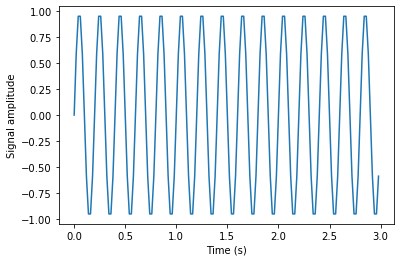

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt

# We build a wavelength for 1 sec.
# Frequency as Hertz (cycles/second)
freq  = 5 
# Sample rate
freq_samp = 50
t = np.linspace(0, 3, 3 * freq_samp, endpoint=False)    # params(start, stop, samples, endpoint-included)
vals = np.sin(freq  * 2 * np.pi * t)                    # array as rad
figure, axis = plt.subplots()
axis.plot(t, vals)
axis.set_xlabel ('Time (s)')
axis.set_ylabel ('Signal amplitude')
plt.show()

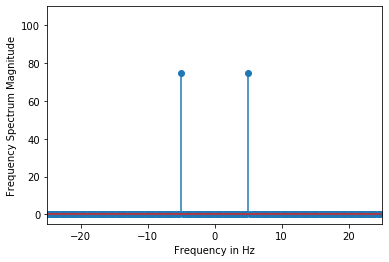

In [24]:
from scipy import fftpack

# Plot the FFT of the previous data
V = fftpack.fft(vals)
frequency = fftpack.fftfreq(len(vals)) * freq_samp
figure, axis = plt.subplots()

axis.stem(frequency, np.abs(V), use_line_collection=True)
axis.set_xlabel('Frequency in Hz')
axis.set_ylabel('Frequency Spectrum Magnitude')
axis.set_xlim(-freq_samp / 2, freq_samp/ 2)
axis.set_ylim(-5, 110)
plt.show()

- The output is a one-dimensional array.
- Input containing complex values are zero except two points.
- In DFT example we visualize the magnitude of the signal.

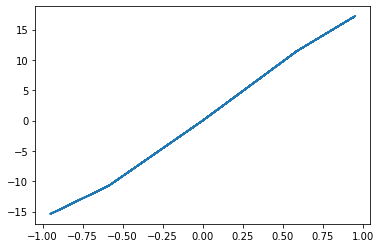

In [28]:
from scipy import optimize

def function(x):
    return   x*2 + 20 * np.sin(x)

plt.plot(vals, function(vals))
plt.show()
# use BFGS algorithm for optimization (Broyden–Fletcher–Goldfarb–Shanno algorithm)
# BFGS is an iterative method for solving unconstrained nonlinear optimization problems


- In this example, optimization is done with the help of the gradient descent algorithm from the initial point
- But the possible issue is local minima instead of global minima. If we don't find a neighbor of global minima, then we need to apply global optimization and find global minima function used as basinhopping() which combines local optimizer.

In [30]:
# Now use basinhopping with the same function as before


#### Nelder–Mead Algorithm:
Nelder-Mead algorithm selects through method parameter.
- It provides the most straightforward way of minimization for fair behaved function.
- Nelder–Mead is not used for gradient evaluations because it may take a longer time to find the solution.

In [ ]:
from scipy.optimize import minimize

# Define function:
def f(x): 
    return .4*(1 - x[0])**2

# Use Nelder-Mead to minimize the function 'f' using [2, -1] as seed


#### Image Processing

Package: scipy.ndimage
- ndimage means the "n" dimensional image.
- used to perform Geometrics transformation (rotate, crop, flip), image filtering (sharp and de nosing), display image, image segmentation, classification and features extraction.

Note: MISC Package in SciPy contains prebuilt images which can be used as examples

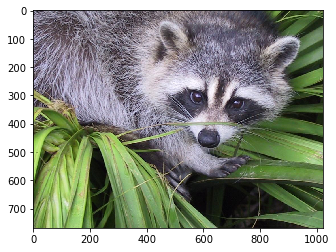

In [32]:
from scipy import misc

#get face image of panda from misc package
face = misc.face()
#plot or show image of face
plt.imshow(face)
plt.show()

In [ ]:
# Flip Down using scipy misc.face image  
flip_down


In [ ]:
# Rotacion
from scipy import ndimage, misc

#rotation function of scipy for image – image rotated 45 degree
rotated_face


#### Numerical Integration

Package: scipy.integrate
- single integration, double, triple, multiple, Gaussian quadrate, Romberg, Trapezoidal and Simpson's rules.


In [ ]:
from scipy import integrate

# take f(x) function as f
f = lambda x : x**2

# Single integration with a = 0 & b = 1  


In [ ]:
# import square root function from math lib
from math import sqrt

# set  fuction f(x)
f = lambda x, y : 64 *x*y
# lower limit of second integral
p = lambda x : 0
# upper limit of first integral
q = lambda y : sqrt(1 - 2*y**2)

# perform double integration


#### Summary of libraries:

| Package Name | Description |
| --- | --- | 
| scipy.io | File input/output |
| scipy.special	| Special Function |
| scipy.linalg | Linear Algebra Operation |
| scipy.interpolate	| Interpolation | 
| scipy.optimize | Optimization and fit |
| scipy.stats | Statistics and random numbers |
| scipy.integrate | Numerical Integration | 
| scipy.fftpack | Fast Fourier transforms |
| scipy.signal | Signal Processing | 
| scipy.ndimage | Image manipulation |